##### Import

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.activations as activations
import tensorflow.keras.datasets.mnist as MNIST_data
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import time
from ResNet import ResNet
def load_model(model_name:str = None):
    if model_name == None:
        return keras.models.load_model('../models/' + input('model name:'))
    else:
        return keras.models.load_model('../models/' + model_name)
def save_model(model):
    tf.saved_model.save(model, '../models/' + model.name)
    # model.save()
def predict(model, data, index):
    return np.argmax(model.predict(data[index:index+1]))
def show(data, cmap='gray'):
    plt.imshow(data, cmap=cmap)
    plt.colorbar()
    plt.show(block=True)

##### Model 模板

> ###### tensorboard --logdir \<path\>

In [2]:
def create_NN_model(name=None, compile_pramas={}):
    m = keras.Sequential([
        layers.Flatten(),
        layers.Dense(128, activation=activations.relu),
        layers.Dense(50, activation=activations.relu),
        layers.Dense(10, activation=activations.softmax)
    ], name=name)
    m.compile(**compile_pramas)

    return m

In [8]:
def create_CNN_model(name=None, compile_pramas={}):
    m = keras.Sequential([
        layers.Conv1D(32, 4, activation=activations.relu),
        layers.MaxPool1D(4),
        layers.Flatten(),
        layers.Dense(128, activation=activations.relu),
        layers.Dense(50, activation=activations.relu),
        layers.Dense(10, activation=activations.softmax)
    ], name=name)
    m.compile(**compile_pramas)

    return m

##### 自定義Callback

In [6]:
class Callback_log(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch} is finished.')
        for l in logs.keys():
            print(f'{l}: {logs[l]}')
        print('='*20)
        print()

class Callback_log_file(keras.callbacks.Callback):
    def __init__(self, name, describe=None):
        super().__init__()
        self.file_name = name + '.log'
        self.model_name = name
        self.train_start_time = time.time()
        self.describe = describe
        self.path = '../logs/' + self.model_name + '/' + self.file_name

    def on_train_begin(self, logs=None):
        with open(self.path, 'a') as file:
            file.write(self.model_name + '\n\n')
            file.write(f'Train start at {time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())}.\n\n')
            file.write(f'Describe: {self.describe}.\n')
            file.write('='*20 + '\n\n')

    def on_epoch_end(self, epoch, logs=None):
        with open(self.path, 'a') as file:
            file.write(f'Epoch {epoch} is finished.\n')
            for l in logs.keys():
                file.write(f'{l}: {logs[l]}\n')
            file.write('='*20 + '\n\n')
    
    def on_train_end(self, logs=None):
        with open(self.path, 'a') as file:
            for l in logs.keys():
                file.write(f'{l}: {logs[l]}\n')
            file.write(f'\nTrain finish at {time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())}.\n')
            file.write(f'Use times: {time.time() - self.train_start_time} sec.')

##### Load MNIST

In [4]:
(x_train, y_train), (x_test, y_test) = MNIST_data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

##### Create model

###### NN

In [5]:
model = create_NN_model('NN' + time.strftime("%Y-%m-%d", time.localtime()), 
                        {'optimizer':'adam',
                        'loss':'sparse_categorical_crossentropy',
                        'metrics':['accuracy']})

In [15]:
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_test, y_test))
                    # verbose=0,
                    # callbacks=[keras.callbacks.TensorBoard('../logs/' + model.name),
                    #            Callback_log_file(model.name, '經典MINST，沒做任何數據前處理，只有將顏色值範圍壓縮至0~1之間'),
                    #            Callback_log()], 

Epoch 1/10
600/600 [==============================] - 4s 4ms/step - loss: 0.3131 - accuracy: 0.9101 - val_loss: 0.1413 - val_accuracy: 0.9576
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1284 - accuracy: 0.9621 - val_loss: 0.1231 - val_accuracy: 0.9612
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.0942 - val_accuracy: 0.9702
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.0803 - val_accuracy: 0.9756
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0745 - val_accuracy: 0.9779
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0882 - val_accuracy: 0.9734
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0773 - val_accuracy: 0.9770
Epoch 

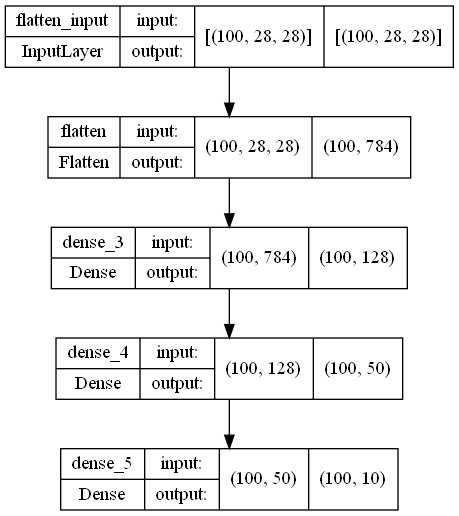

In [16]:
# model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.save('../models/' + model.name)

In [ ]:
tmp = load_model()

In [ ]:
tmp.evaluate(x_test, y_test)
tmp.summary()

In [ ]:
keras.utils.plot_model(tmp)

###### CNN

In [9]:
model = create_CNN_model('CNN' + time.strftime("%Y-%m-%d", time.localtime()), 
                        {'optimizer':'adam',
                        'loss':'sparse_categorical_crossentropy',
                        'metrics':['accuracy']})

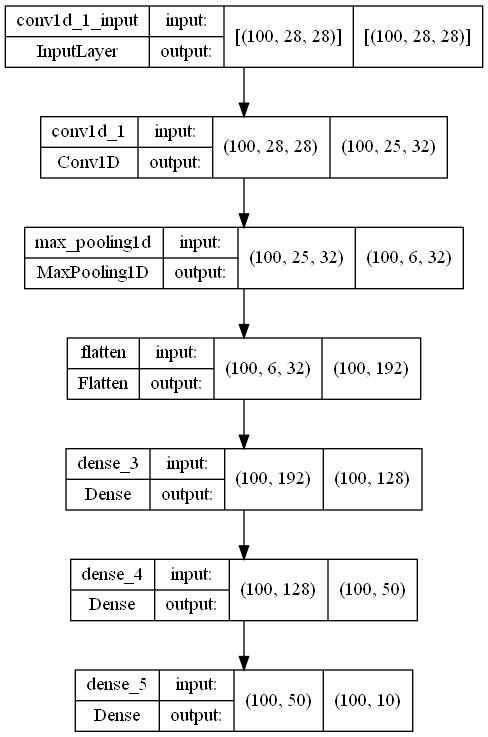

In [11]:
# model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [10]:
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_test, y_test))
                #     verbose=0,
                #     callbacks=[keras.callbacks.TensorBoard('../logs/' + model.name),
                #                Callback_log_file(model.name, '經典MINST，沒做任何數據前處理，只有將顏色值範圍壓縮至0~1之間'),
                #                Callback_log()], 

Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 0.3390 - accuracy: 0.9009 - val_loss: 0.1339 - val_accuracy: 0.9595
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1135 - accuracy: 0.9664 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0804 - accuracy: 0.9753 - val_loss: 0.0650 - val_accuracy: 0.9793
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0638 - accuracy: 0.9806 - val_loss: 0.0587 - val_accuracy: 0.9816
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0467 - val_accuracy: 0.9846
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0532 - val_accuracy: 0.9834
Epoch 

In [ ]:
save_model(model)

##### Predict

In [ ]:
stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
print(short_model_summary)

In [ ]:
model = load_model('CNN2021-11-14')
model.summary()
model.input_shape

In [ ]:
index = []
for i in range(0, len(x_train)):
    if predict(model, x_train, i) != y_train[i]:
        index.append(i)
        print('Index:', i)
        print('Predict:', predict(model, x_train, i))
        print('Answer:', y_train[i])
        show(x_train[i])
print(index)

In [ ]:
index_test = []
for i in range(0, len(x_test)):
    if predict(model, x_test, i) != y_test[i]:
        index_test.append(i)
        print('Index:', i)
        print('Predict:', predict(model, x_test, i))
        print('Answer:', y_test[i])
        show(x_test[i])
print(index_test)

In [ ]:
show(x_train[0])

In [ ]:
import random
i = []
o = []
for j in range(20):
    i.append(random.randint(0, 9))
    o.append(random.randint(0, 9))

i.sort()
o.sort()
inputTensor = np.array(i)
outputTensor = np.array(o)

In [ ]:
w = layers.Dense(1)
layers.Dense.add_weight(w, name="W/read")
b = layers.Dense(1, name="b/read")

test_model = keras.Sequential([
    layers.InputLayer((1), name="Input"),
    w,
    b
], name="test")
test_model.compile()

In [ ]:
test_model.build((None, 1))

In [ ]:
test_model.fit(inputTensor, outputTensor, epochs=1)

In [ ]:
test_model.input_shape

In [ ]:
save_model(test_model)